In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import feature_extraction
from sklearn import model_selection
from sklearn import impute

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline


In [2]:
df = pd.read_csv(r"E:\github\data science projects\2-House Prices\train.csv")
test = pd.read_csv(r"E:\github\data science projects\2-House Prices\test.csv")

data1 = df.copy(deep=True)
test1 = test.copy(deep=True)
combine_data = [data1, test1]

In [3]:
# In order to have description of our Variables

def data_description(file_dest: str, feature_name: str):
    try:
        dict1 = {}
        with open(file_dest, 'r') as f:
            for line in f:
                if line.strip().split(maxsplit=1):
                    s = line.strip().split(maxsplit=1)
                    dict1[s[0]] = s[1]
        print(dict1[feature_name.strip()])
    except KeyError:
       return None


file_dest = r"E:\github\data science projects\2-House Prices\data_description1.txt"
data_description(file_dest, feature_name='GrLivArea')

Above grade (ground) living area square feet


 went through this process and concluded that the following variables can play an important role in this problem:  

1. OverallQual (which is a variable that I don't like because I don't know how it was computed)  
2. YearBuilt.  
3. TotalBsmtSF.  
4. GrLivArea.  

analysing 'SalePrice'

In [4]:
#descriptive statistics summary
data1['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

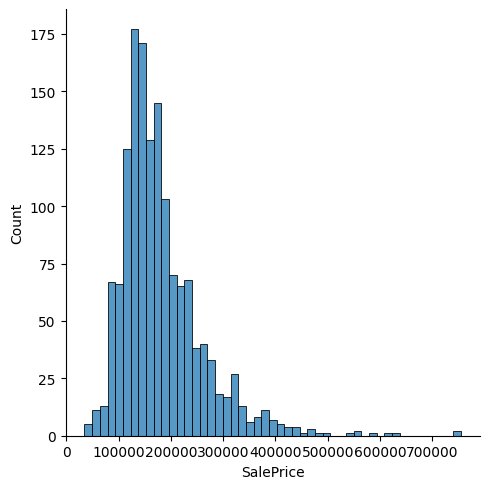

In [5]:
#histogram
sns.displot(data1['SalePrice']);

In [6]:
#skewness and kurtosis
print("Skewness: %f" % data1['SalePrice'].skew())
print("Kurtosis: %f" % data1['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


'SalePrice' relationship with numerical variables

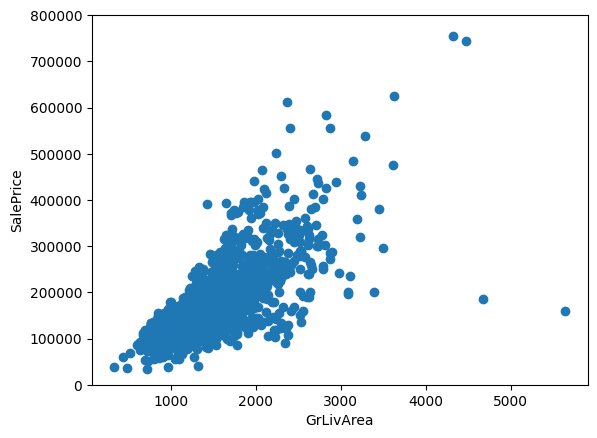

In [16]:
plt.scatter(x=data1['GrLivArea'], y=data1["SalePrice"])
plt.xlabel('GrLivArea') 
plt.ylabel('SalePrice')
plt.ylim((0, 800000))
plt.show()

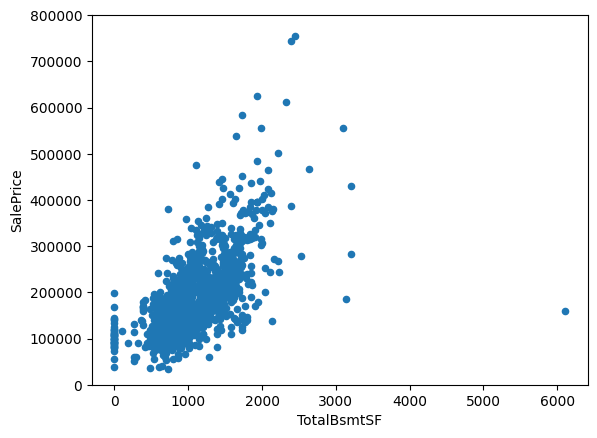

In [17]:
#scatter plot totalbsmtsf/saleprice
data1[["TotalBsmtSF", "SalePrice"]].plot.scatter(x="TotalBsmtSF", y="SalePrice", ylim=(0, 800000))
plt.show()

Relationship with categorical features


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

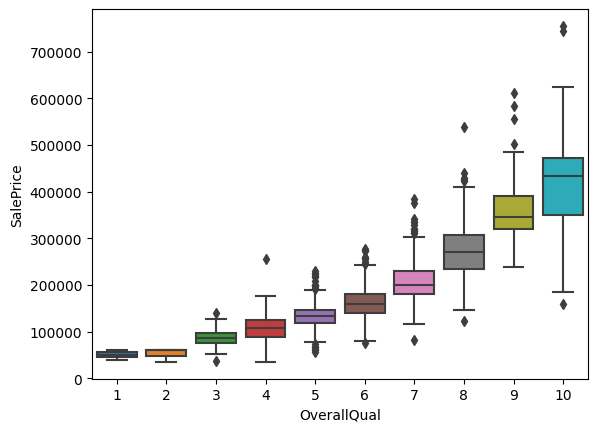

In [34]:
#box plot overallqual/saleprice
sns.boxplot(x=data1["OverallQual"], y=data1["SalePrice"])

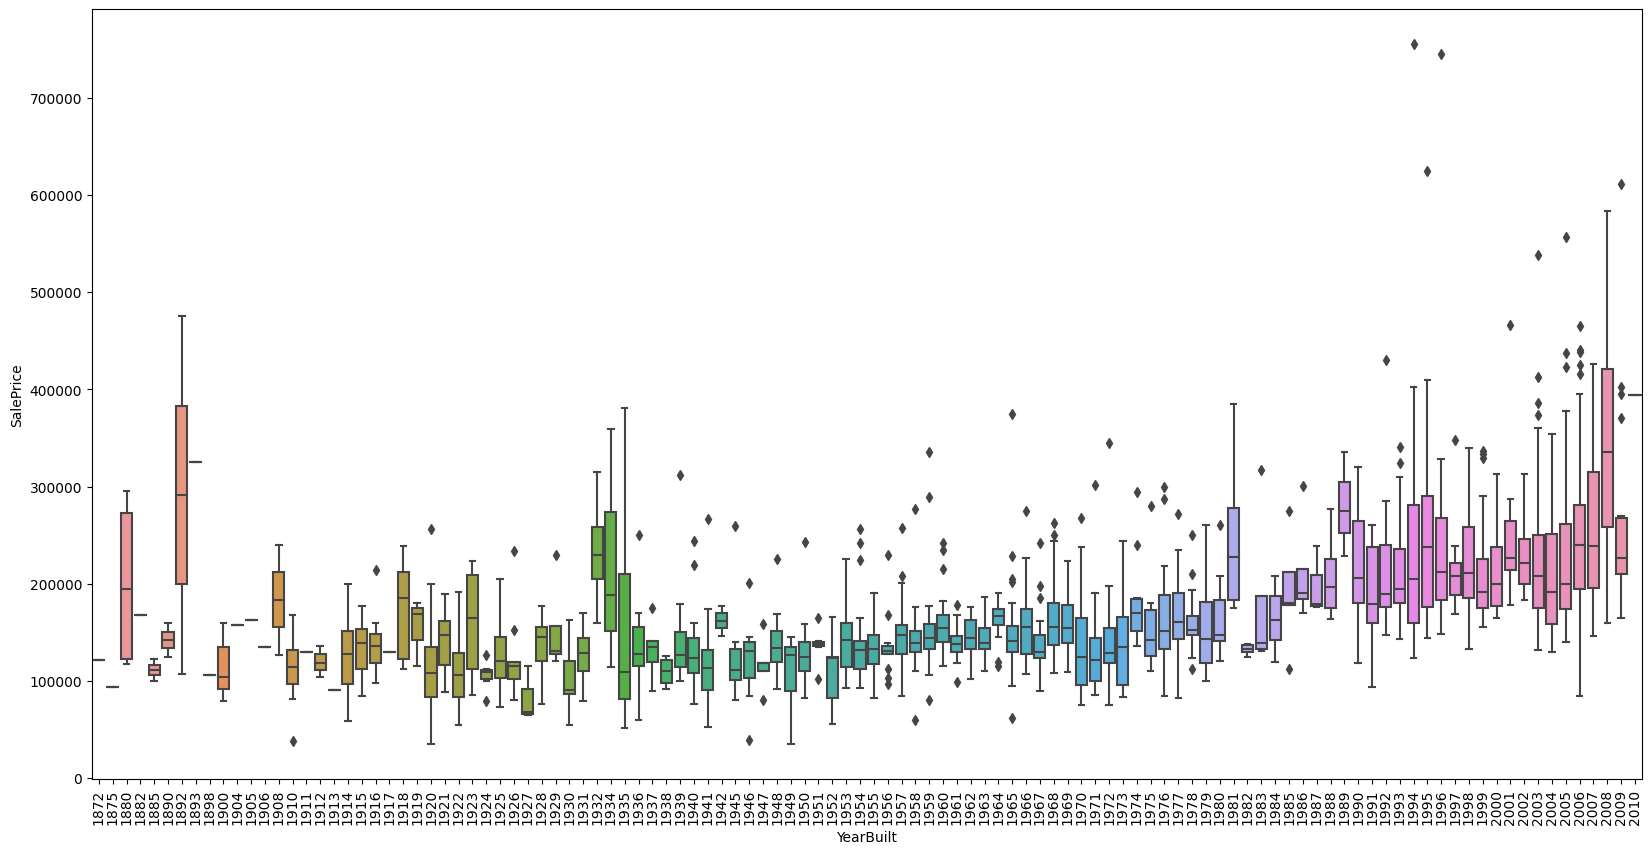

In [39]:
#box plot YearBuilt/saleprice
plt.figure(figsize=(20,10))
sns.boxplot(x=data1["YearBuilt"], y=data1["SalePrice"])
plt.xticks(rotation=90)
plt.show()

In [5]:
def null_count(data, threshold=0.5):
    for i in data.columns:
        if data[i].isnull().mean() != 0 and data[i].isnull().mean()> threshold:
            print(f"percentage of null in   {i}:  {data[i].isnull().mean() :.3f}")
            # print(f"number of null in   {i}:  {data[i].isnull().sum() :.3f} of {data.shape[0]}",'\n')


print('null in data1:')
null_count(data1, 0.7)
print('\nnull in test1:')
null_count(test1, 0.7)

null in data1:
percentage of null in   Alley:  0.938
percentage of null in   PoolQC:  0.995
percentage of null in   Fence:  0.808
percentage of null in   MiscFeature:  0.963

null in test1:
percentage of null in   Alley:  0.927
percentage of null in   PoolQC:  0.998
percentage of null in   Fence:  0.801
percentage of null in   MiscFeature:  0.965


In [6]:
drop_columns = ["Id", "Alley", "PoolQC", "Fence", "MiscFeature"]

for d in combine_data:
    d.drop(drop_columns, axis=1, inplace=True)

In [7]:
data1_null_variables = list(data1.columns[data1.isnull().any()])
test1_null_variables = list(test1.columns[test1.isnull().any()])
print(data1_null_variables)
print(test1_null_variables)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']


In [8]:
for d in combine_data:
    for i in data1.columns[:-1]:
        if d[i].dtype == 'float64' or  d[i].dtype == 'int64':
            d[i].fillna(d[i].median(), inplace=True)
        if d[i].dtype == 'object':
            d[i].fillna(d[i].mode()[0], inplace=True)

print(data1.info())
print(test1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [34]:
print(data1["MSSubClass"].value_counts())
print(test1["MSSubClass"].value_counts())

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
MSSubClass
20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
75       7
180      7
45       6
40       2
150      1
Name: count, dtype: int64


In [50]:
for i in test1["MSSubClass"].value_counts().index:
    if i not in data1["MSSubClass"].value_counts().index:
        print(i)

150


In [44]:
data1["MSSubClass"].loc[data1["MSSubClass"] == 20]

1       20
6       20
10      20
12      20
13      20
        ..
1453    20
1454    20
1456    20
1458    20
1459    20
Name: MSSubClass, Length: 536, dtype: int64

In [68]:
test1["MSSubClass"].unique()

array([ 20,  60, 120, 160,  80,  30,  50,  90,  85, 190,  45,  70,  75,
       180,  40, 150], dtype=int64)

In [59]:
data1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [95]:
def handle_unknown(train_set, test_set):
    column = train_set.columns[:-1]
    unknown = {}
    for i in column:
       unknown[i] = []
       train_categories =  train_set[i].unique()
       test_categories =  test_set[i].unique()
       for j in test_categories:
           if j not in train_categories:
               unknown[i] += [j]
    
    for u in list(unknown):
        if unknown[u] == []:
            unknown.pop(u)
    return unknown

handle_unknown(data1, test1)

{'MSSubClass': [150],
 'LotFrontage': [26.0,
  25.0,
  119.0,
  31.0,
  28.0,
  117.0,
  113.0,
  125.0,
  135.0,
  136.0,
  22.0,
  123.0,
  195.0,
  155.0,
  126.0,
  200.0,
  131.0,
  133.0],
 'LotArea': [11622,
  14267,
  13830,
  9978,
  5005,
  7980,
  10176,
  5858,
  12858,
  12883,
  11520,
  14122,
  14300,
  7132,
  18494,
  3203,
  8577,
  17433,
  8987,
  9215,
  11920,
  15410,
  13143,
  11134,
  4835,
  3515,
  3215,
  2980,
  2403,
  12853,
  7379,
  10456,
  18837,
  9680,
  10600,
  13260,
  9724,
  17360,
  11380,
  8267,
  8050,
  10725,
  10032,
  8382,
  10950,
  10895,
  13587,
  7898,
  7635,
  4485,
  5805,
  8239,
  9656,
  9045,
  10560,
  5830,
  7793,
  6360,
  8094,
  3068,
  15263,
  10632,
  6001,
  6449,
  6048,
  10773,
  7832,
  7424,
  11227,
  20062,
  9259,
  17082,
  18600,
  11479,
  17485,
  11980,
  12361,
  7360,
  14235,
  11105,
  15240,
  7480,
  10389,
  8842,
  10044,
  11792,
  6410,
  4853,
  7890,
  9839,
  15600,
  19645,
  3907,
  8

In [100]:
data1['LotFrontage'].value_counts()

LotFrontage
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64